
# VNU 2021 April 10th

**Exercise 3**
Author: Associate Professor Lemai Nguyen

Reference:
**Pima Indians Diabetes Database**
Predict the onset of diabetes based on diagnostic measures

**Context**: This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Data**: The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Acknowledgements**

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

**Inspiration**

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

**Source**: https://www.kaggle.com/uciml/pima-indians-diabetes-database

**Loading Libraries and Functions**

Read about DecisionTreeClassifier at:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Train Test Split:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

Classification metrics:
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

See also https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c 

In [1]:
# load libraries
import pandas as pd #for data manipulation and analysis
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation


In [ ]:
!pip install pydotplus #interface for graph visualisation
!pip install graphviz #for graph visualisation

**Loading Data**


1.   Load the dataset
2.   Explore the data



In [ ]:
# load dataset

records = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/VNU2021/Diabetes.csv")

#explore the dataset
print(records)

print('Sample size:', records.shape[0])
print('Number of columns:', records.shape[1]) 
print('General stats:')
records.describe()

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]
Sample size: 768
Number of columns: 9
General stats:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Feature Selection**

Select predictors (attributes) for Classification
Set role (Target)

In [ ]:
#feature selection
features = records.columns[0:7] #these are the selected attributes to be the predictors

X=records[features]  #Input data
y=records['Outcome'] # Target variable

print(records.head())
print(X.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
   Pregnancies  Glucose  BloodPressure  ...  Insulin   BMI  DiabetesPedigreeFunction
0            6      148             72  ...        0  33.6                     0.627
1            1       85             66  ...        0  26.6                     0.351
2            8      183             64  ...        0  23.3                     0.672
3            1       89             66  ...       94  28.1                     0.167
4            0      137             40  ...      

**Handle Missing Data: skip**

**Split the Dataset**

Split arrays or matrices into random train and test subsets
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  # 80% training and 20% testing 

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape[0])
print('Test dataset size:',X_test.shape[0])

     Pregnancies  Glucose  ...   BMI  DiabetesPedigreeFunction
663            9      145  ...  37.9                     0.637
712           10      129  ...  41.2                     0.441
161            7      102  ...  37.2                     0.204
509            8      120  ...  25.0                     0.409
305            2      120  ...  39.7                     0.215

[5 rows x 7 columns]
663    1
712    1
161    0
509    0
305    0
Name: Outcome, dtype: int64
Training dataset size: 614
Test dataset size: 154


**Training a DT Model**

1.   Train a model using the training dataset
2.   Make prediction using the model for the test dataset

Read about DecisionTreeClassifier at: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html




In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=25) #default criterion is gini

# Train Decision Tree Classifer with the traning dataset 
clf = clf.fit(X_train, y_train)

#Make predictions for the test dataset
y_pred = clf.predict(X_test)


**Inspect Predictions**

In [ ]:
#inspection
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
inspection.head(20)

,Actual,Predicted
285,0,1
101,0,0
581,0,0
352,0,0
726,0,0
472,0,1
233,0,1
385,0,0
556,0,0
59,0,0


**Model Evaluation**



1.   Calculate Accuracy, Precision, Recall, F1


Classification metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics







In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix

#Model Evaluation, calculate metrics: Accuracy, Precision, Recall, F1,
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1: ", metrics.f1_score(y_test,y_pred))



Accuracy:  0.6493506493506493
Precision:  0.5076923076923077
Recall:  0.6
F1:  0.5499999999999999


In [ ]:
#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[67 32]
 [22 33]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71        99
           1       0.51      0.60      0.55        55

    accuracy                           0.65       154
   macro avg       0.63      0.64      0.63       154
weighted avg       0.67      0.65      0.65       154



**Plot ROC (Receiver operating characteristic) curve and confusion matrix**

ROC surve
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html?highlight=plot_roc_curve#sklearn.metrics.plot_roc_curve

Confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html?highlight=plot%20confusion%20matrix#sklearn.metrics.plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


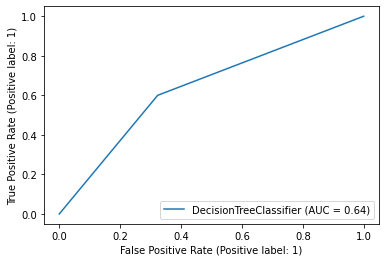

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


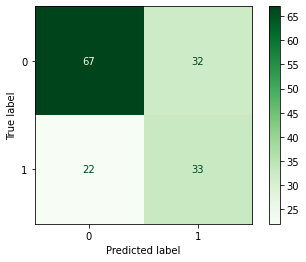

In [ ]:

metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()   

plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Greens, values_format = '.5g')  
plt.show()

**Visualise the DT model**

In [ ]:
from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Diabetes.png')
Image(graph.create_png())

ModuleNotFoundError: ignored

**Tuning the decision tree model hyper parameters**

In [ ]:
#Let's optimise the decision tree
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1: ", metrics.f1_score(y_test,y_pred))

#disp = plot_precision_recall_curve(clf, X_test, y_test)

metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()   

plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Greens, values_format = '.5g')  
plt.show()

In [ ]:
#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

**Visualise the new DT**

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Diabetes.png')
Image(graph.create_png())

**Create Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Creat a RandomForestClassifier object
rfclf = RandomForestClassifier(n_estimators = 30,max_depth=5,criterion="entropy")

#Train the RandomForestClassifier
rfclf.fit(X_train,y_train)

#Make predictions
y_pred = rfclf.predict(X_test)

#Evaluate the RandomForestClassifier
print(classification_report(y_test, y_pred))

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1: ", metrics.f1_score(y_test,y_pred))

metrics.plot_roc_curve(rfclf, X_test, y_test)  
plt.show()   

plot_confusion_matrix(rfclf, X_test, y_test, cmap=plt.cm.Greens, values_format = '.5g')  
plt.show()